In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

---
## **Load Tables**

In [2]:
excel_file = pd.ExcelFile('RFM Analysis.xlsx')
sheet_names = excel_file.sheet_names
sheet_names

['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']

In [3]:
NewCustomerList_df = pd.read_excel(excel_file, sheet_name='NewCustomerList')
NewCustomerList_df.tail()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.67,0.6700,0.6700,0.670000,996,996,0.374
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.84,0.8400,1.0500,0.892500,997,997,0.357
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.73,0.9125,0.9125,0.912500,997,997,0.357
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.84,1.0500,1.0500,0.892500,997,997,0.357
999,Sylas,Duffill,Male,56,1955-10-02,Staff Accountant IV,Property,Mass Customer,N,Yes,...,NSW,Australia,9,0.68,0.8500,1.0625,0.903125,1000,1000,0.340


In [4]:
NewCustomerList_df.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [5]:
NewCustomerList_df['tenure'] = 0

In [6]:
CustomerDemographic_df = pd.read_excel(excel_file, sheet_name='CustomerDemographic')
CustomerDemographic_df.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24 00:00:00,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0
3999,4000,Kippy,Oldland,Male,76,1991-11-05 00:00:00,Software Engineer IV,NaN,Affluent Customer,N,0/0,No,11.0


In [7]:
CustomerDemographic_df.drop('default', axis=1, inplace=True)

In [8]:
CustomerDemographic_df.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24 00:00:00,NaN,Manufacturing,Affluent Customer,N,Yes,10.0
3999,4000,Kippy,Oldland,Male,76,1991-11-05 00:00:00,Software Engineer IV,NaN,Affluent Customer,N,No,11.0


In [9]:
CustomerAddress_df = pd.read_excel(excel_file, sheet_name='CustomerAddress')
CustomerAddress_df

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [10]:
CustomerAddress_df.drop([3996,3997,3998], inplace=True)
CustomerAddress_df

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3991,3996,0 Transport Center,3977,VIC,Australia,6
3992,3997,4 Dovetail Crossing,2350,NSW,Australia,2
3993,3998,736 Roxbury Junction,2540,NSW,Australia,6
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3


---
## **Add ID to New Customer Table**

In [11]:
NewCustomerList_df['customer_id'] = list(range(4001, 5001))
NewCustomerList_df

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,customer_id
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.97,1.2125,1.515625,1.288281,1,1,1.718750,4001
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.69,0.6900,0.862500,0.733125,1,1,1.718750,4002
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.95,0.9500,0.950000,0.950000,1,1,1.718750,4003
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,1.00,1.2500,1.250000,1.250000,4,4,1.703125,4004
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.97,0.9700,1.212500,1.212500,4,4,1.703125,4005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,Australia,7,0.67,0.6700,0.670000,0.670000,996,996,0.374000,4996
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,Australia,10,0.84,0.8400,1.050000,0.892500,997,997,0.357000,4997
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,Australia,2,0.73,0.9125,0.912500,0.912500,997,997,0.357000,4998
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,Australia,2,0.84,1.0500,1.050000,0.892500,997,997,0.357000,4999


---
## **Merge all customers into one table**

#### **First Table (Customer Information):**
* **customer_id:** Unique identifier for each customer.
* **name:** Full name of the customer.
* **gender:** The gender of the customer (e.g., Male, Female).
* **past_3_years_bike_related_purchases:** The number of bike-related purchases made by the customer in the past three years.
* **age:** The age of the customer.
* **job_title:** The customer’s job or role in their profession.
* **job_industry_category:** The industry in which the customer works (e.g., Health, Financial Services, IT).
* **wealth_segment:** The wealth classification of the customer (e.g., Mass Customer, Affluent Customer).
* **deceased_indicator:** Indicates whether the customer is deceased (Yes or No).
* **owns_car:** Indicates if the customer owns a car (Yes or No).
* **tenure:** The number of years the customer has been associated with the company or service.

In [12]:
CustomerDemographic_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [13]:
NewCustomerList_df.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value', 'customer_id'],
      dtype='object')

### **Select The Common columns**

In [14]:
NewCustomerList_info = NewCustomerList_df[['customer_id', 'first_name', 'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure']]
NewCustomerList_info

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,4001,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,0
1,4002,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,0
2,4003,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,0
3,4004,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,0
4,4005,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,4996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,0
996,4997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,0
997,4998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,0
998,4999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,0


### **Merging**

In [15]:
All_Customers_df = pd.concat([CustomerDemographic_df, NewCustomerList_info],axis=0)
All_Customers_df = All_Customers_df.reset_index(drop=True)
All_Customers_df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,0.0
4996,4997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,0.0
4997,4998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,0.0
4998,4999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,0.0


---
## **Customers Data Exploration**

In [16]:
All_Customers_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [17]:
All_Customers_df.duplicated().sum()

0

In [18]:
All_Customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          5000 non-null   int64  
 1   first_name                           5000 non-null   object 
 2   last_name                            4846 non-null   object 
 3   gender                               5000 non-null   object 
 4   past_3_years_bike_related_purchases  5000 non-null   int64  
 5   DOB                                  4896 non-null   object 
 6   job_title                            4388 non-null   object 
 7   job_industry_category                4179 non-null   object 
 8   wealth_segment                       5000 non-null   object 
 9   deceased_indicator                   5000 non-null   object 
 10  owns_car                             5000 non-null   object 
 11  tenure                        

In [19]:
All_Customers_df['DOB'] = pd.to_datetime(All_Customers_df['DOB'])

In [20]:
from datetime import datetime

today_data = datetime(2017, 12, 31)
today_data

datetime.datetime(2017, 12, 31, 0, 0)

In [21]:
All_Customers_df['age'] = (today_data - All_Customers_df['DOB']).dt.days // 365
All_Customers_df.drop('DOB', axis=1, inplace=True)
All_Customers_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,64.0
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,37.0
2,3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,63.0
3,4,Talbot,NaN,Male,33,NaN,IT,Mass Customer,N,No,7.0,56.0
4,5,Sheila-kathryn,Calton,Female,56,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,40.0


In [22]:
All_Customers_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,64.0
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,37.0
2,3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,63.0
3,4,Talbot,NaN,Male,33,NaN,IT,Mass Customer,N,No,7.0,56.0
4,5,Sheila-kathryn,Calton,Female,56,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,40.0


In [23]:
All_Customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          5000 non-null   int64  
 1   first_name                           5000 non-null   object 
 2   last_name                            4846 non-null   object 
 3   gender                               5000 non-null   object 
 4   past_3_years_bike_related_purchases  5000 non-null   int64  
 5   job_title                            4388 non-null   object 
 6   job_industry_category                4179 non-null   object 
 7   wealth_segment                       5000 non-null   object 
 8   deceased_indicator                   5000 non-null   object 
 9   owns_car                             5000 non-null   object 
 10  tenure                               4913 non-null   float64
 11  age                           

In [24]:
All_Customers_df.describe(include='O').T

,count,unique,top,freq
first_name,5000,3729,Tobe,5
last_name,4846,4614,Pristnor,3
gender,5000,6,Female,2550
job_title,4388,195,Business Systems Development Analyst,55
job_industry_category,4179,9,Manufacturing,998
wealth_segment,5000,3,Mass Customer,2508
deceased_indicator,5000,2,N,4998
owns_car,5000,2,Yes,2517


In [25]:
All_Customers_df['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [26]:
All_Customers_df['gender'].replace({'F':'Female', 'Femal':'Female', 'M':'Male', 'U':'Unknown'}, inplace=True)
All_Customers_df['gender'].unique()

array(['Female', 'Male', 'Unknown'], dtype=object)

In [27]:
cols = ['job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car']

for col in cols:
    print(col)
    print(All_Customers_df[col].unique())
    print(All_Customers_df[col].value_counts())
    print('-'*40)

job_industry_category
['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']
job_industry_category
Manufacturing         998
Financial Services    977
Health                754
Retail                436
Property              331
IT                    274
Entertainment         173
Argiculture           139
Telecommunications     97
Name: count, dtype: int64
----------------------------------------
wealth_segment
['Mass Customer' 'Affluent Customer' 'High Net Worth']
wealth_segment
Mass Customer        2508
High Net Worth       1272
Affluent Customer    1220
Name: count, dtype: int64
----------------------------------------
deceased_indicator
['N' 'Y']
deceased_indicator
N    4998
Y       2
Name: count, dtype: int64
----------------------------------------
owns_car
['Yes' 'No']
owns_car
Yes    2517
No     2483
Name: count, dtype: int64
----------------------------------------


In [28]:
All_Customers_df['deceased_indicator'].replace({'N':'No', 'Y':'Yes'}, inplace=True)
All_Customers_df['deceased_indicator'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
All_Customers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
past_3_years_bike_related_purchases,5000.0,49.079200,28.533471,0.0,24.00,49.0,73.00,99.0
tenure,4913.0,8.487889,6.627992,0.0,2.00,8.0,14.00,22.0
age,4896.0,41.251838,13.996968,15.0,31.00,41.0,52.00,174.0


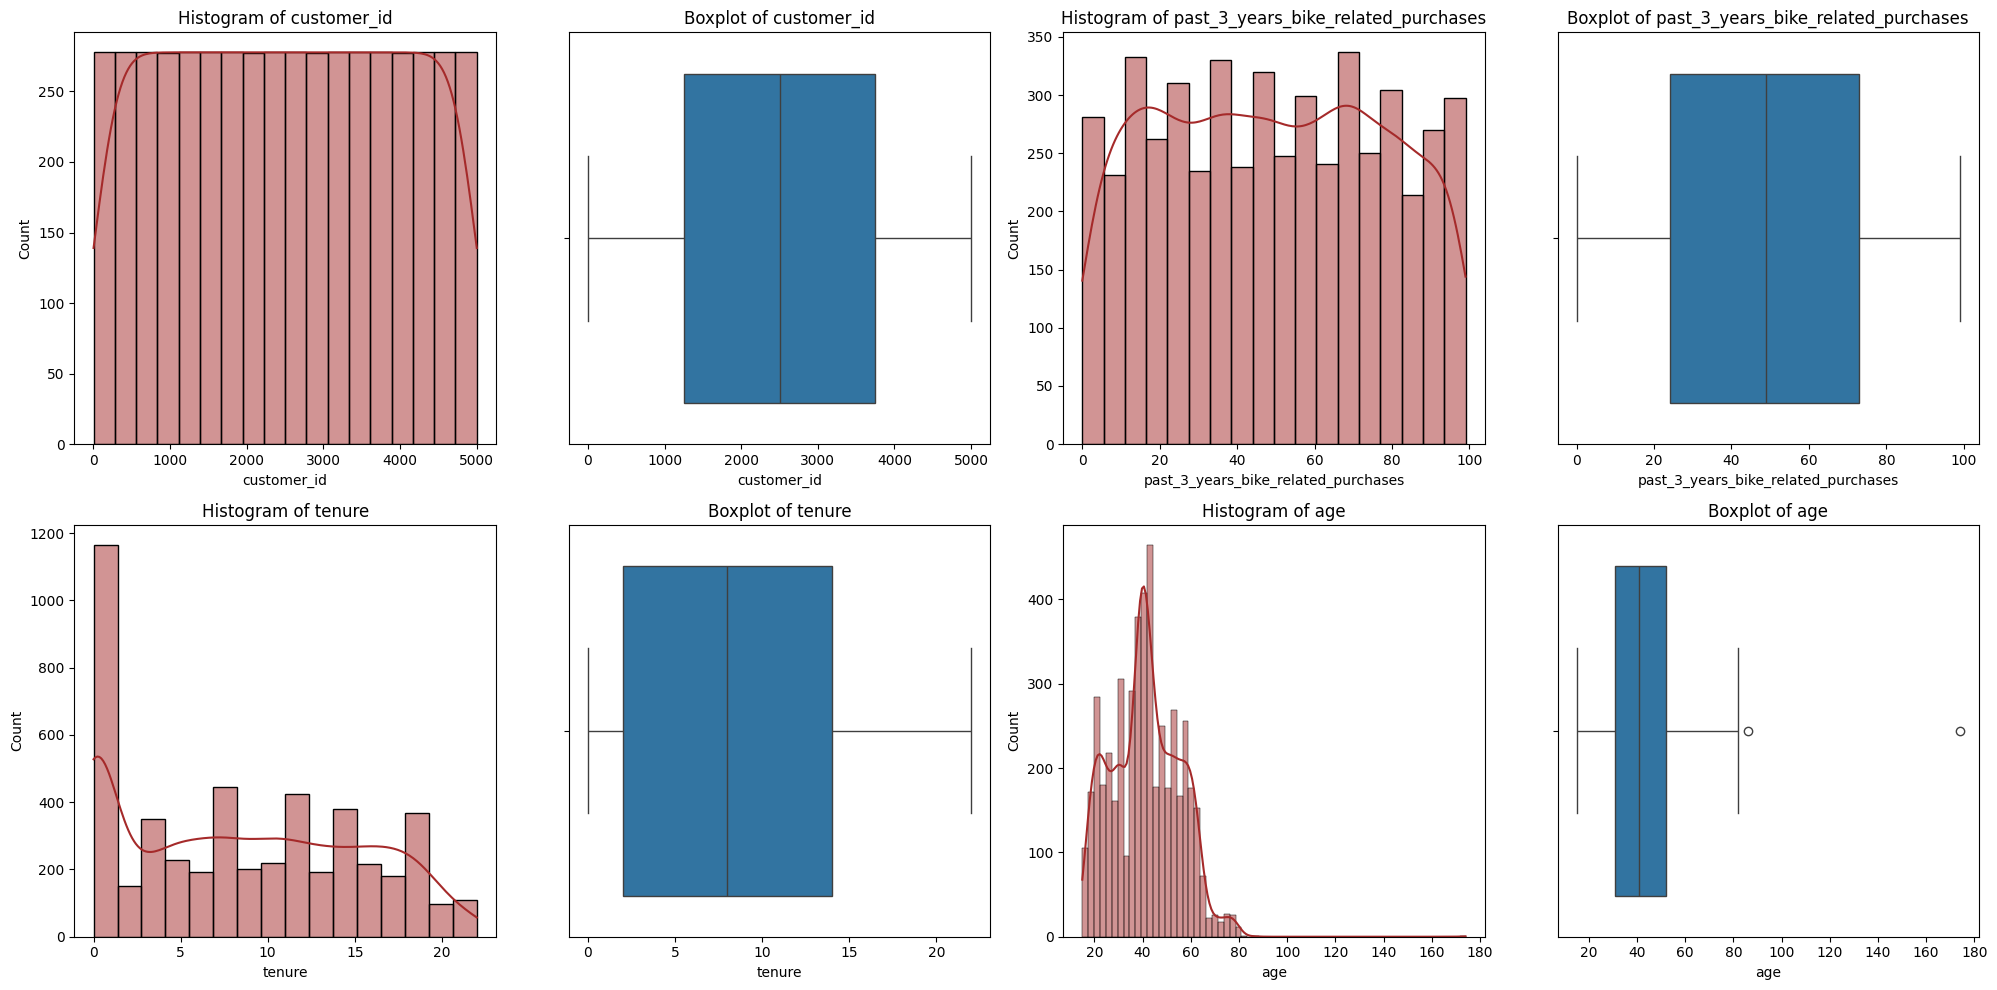

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
num_columns = All_Customers_df.select_dtypes(exclude='object')

n_cols = 4  # Set the number of columns per row to 4
n_rows = len(num_columns.columns) // n_cols + (len(num_columns.columns) % n_cols > 0)  # Calculate number of rows

# Create a grid for plots with 4 columns per row
fig, axes = plt.subplots(nrows=n_rows*2, ncols=n_cols, figsize=(5*n_cols, 5*n_rows*2))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the numerical columns and plot histogram and boxplot
for i, col in enumerate(num_columns.columns):
    # Plot histogram in the top half of the grid
    # sns.boxplot(df[col], orient='h')
    sns.histplot(num_columns[col], ax=axes[i*2], kde=True, color='brown')
    axes[i*2].set_title(f'Histogram of {col}')
    
    # Plot boxplot in the bottom half of the grid
    sns.boxplot(num_columns[col], orient='h', ax=axes[i*2 + 1])
    axes[i*2 + 1].set_title(f'Boxplot of {col}')

# Remove empty subplots (if any)
for j in range(i*2 + 2, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [31]:
All_Customers_df[All_Customers_df['age']==174.0]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
33,34,Jephthah,Bachmann,Unknown,59,Legal Assistant,IT,Affluent Customer,No,No,20.0,174.0


In [32]:
All_Customers_df.drop(All_Customers_df[All_Customers_df['age']==174.0].index, inplace=True)

In [33]:
All_Customers_df.isnull().mean() * 100

customer_id                             0.000000
first_name                              0.000000
last_name                               3.080616
gender                                  0.000000
past_3_years_bike_related_purchases     0.000000
job_title                              12.242448
job_industry_category                  16.423285
wealth_segment                          0.000000
deceased_indicator                      0.000000
owns_car                                0.000000
tenure                                  1.740348
age                                     2.080416
dtype: float64

In [34]:
All_Customers_df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              154
gender                                   0
past_3_years_bike_related_purchases      0
job_title                              612
job_industry_category                  821
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
age                                    104
dtype: int64

In [35]:
All_Customers_df['name'] = All_Customers_df['first_name'].fillna('').str.cat(All_Customers_df['last_name'].fillna(''), sep=' ').str.strip()
All_Customers_df.drop(['first_name', 'last_name'], axis=1, inplace=True)
All_Customers_df.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,name
0,1,Female,93,Executive Secretary,Health,Mass Customer,No,Yes,11.0,64.0,Laraine Medendorp
1,2,Male,81,Administrative Officer,Financial Services,Mass Customer,No,Yes,16.0,37.0,Eli Bockman
2,3,Male,61,Recruiting Manager,Property,Mass Customer,No,Yes,15.0,63.0,Arlin Dearle
3,4,Male,33,NaN,IT,Mass Customer,No,No,7.0,56.0,Talbot
4,5,Female,56,Senior Editor,NaN,Affluent Customer,No,Yes,8.0,40.0,Sheila-kathryn Calton


In [36]:
All_Customers_df['job_title'].fillna('N/A', inplace = True)
All_Customers_df['job_industry_category'].fillna('N/A', inplace = True)
All_Customers_df['tenure'].fillna(0, inplace = True)

In [37]:
All_Customers_df.isnull().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
age                                    104
name                                     0
dtype: int64

In [38]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

temp_df = All_Customers_df.drop(['customer_id', 'name'], axis=1)

numerical_cols = temp_df.select_dtypes(include='number').columns
categorical_cols = temp_df.select_dtypes(include='object').columns

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = pd.DataFrame(onehot_encoder.fit_transform(temp_df[categorical_cols]),
                                   columns=onehot_encoder.get_feature_names_out(categorical_cols),
                                   index=temp_df.index)  # Make sure indices match the original dataframe

# Impute missing values in numerical columns
imputer = KNNImputer(n_neighbors=3)
imputed_numerical = pd.DataFrame(imputer.fit_transform(temp_df[numerical_cols]), 
                                 columns=numerical_cols, 
                                 index=temp_df.index)  # Ensure indices match

# Concatenate the imputed numerical columns and the encoded categorical columns
df_imputed = pd.concat([imputed_numerical, encoded_categorical], axis=1)

# Update the original dataframe with imputed values
All_Customers_df[numerical_cols] = df_imputed[numerical_cols]

All_Customers_df.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,name
0,1,Female,93.0,Executive Secretary,Health,Mass Customer,No,Yes,11.0,64.0,Laraine Medendorp
1,2,Male,81.0,Administrative Officer,Financial Services,Mass Customer,No,Yes,16.0,37.0,Eli Bockman
2,3,Male,61.0,Recruiting Manager,Property,Mass Customer,No,Yes,15.0,63.0,Arlin Dearle
3,4,Male,33.0,N/A,IT,Mass Customer,No,No,7.0,56.0,Talbot
4,5,Female,56.0,Senior Editor,N/A,Affluent Customer,No,Yes,8.0,40.0,Sheila-kathryn Calton


In [39]:
All_Customers_df.isnull().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
age                                    0
name                                   0
dtype: int64

In [40]:
All_Customers_df['past_3_years_bike_related_purchases'] = All_Customers_df['past_3_years_bike_related_purchases'].astype(int)
All_Customers_df['age'] = All_Customers_df['age'].astype(int)
All_Customers_df['tenure'] = All_Customers_df['tenure'].astype(int)

In [41]:
new_column_order = ['customer_id', 'name', 'gender', 'past_3_years_bike_related_purchases', 'age', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure']
All_Customers_df = All_Customers_df[new_column_order]
All_Customers_df

,customer_id,name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine Medendorp,Female,93,64,Executive Secretary,Health,Mass Customer,No,Yes,11
1,2,Eli Bockman,Male,81,37,Administrative Officer,Financial Services,Mass Customer,No,Yes,16
2,3,Arlin Dearle,Male,61,63,Recruiting Manager,Property,Mass Customer,No,Yes,15
3,4,Talbot,Male,33,56,N/A,IT,Mass Customer,No,No,7
4,5,Sheila-kathryn Calton,Female,56,40,Senior Editor,N/A,Affluent Customer,No,Yes,8
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Ferdinand Romanetti,Male,60,58,Paralegal,Financial Services,Affluent Customer,No,No,0
4996,4997,Burk Wortley,Male,22,16,Senior Sales Associate,Health,Mass Customer,No,No,0
4997,4998,Melloney Temby,Female,17,63,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,No,Yes,0
4998,4999,Dickie Cubbini,Male,30,65,Financial Advisor,Financial Services,Mass Customer,No,Yes,0


In [42]:
All_Customers_df.to_csv('Final Sheets\All_Customers.csv', index=False)

---
## **Merge all customer addresses into a one table**

#### **Second Table (Customer Address Information):**
* **customer_id:** Unique identifier that corresponds to the same customer_id in the first table.
* **address:** The full address of the customer.
* **postcode:** The postal code for the customer’s address.
* **state:** The state where the customer resides (e.g., New South Wales, Queensland, Victoria).
* **country:** The country of the customer, which appears to be "Australia" for all entries.
* **property_valuation:** A rating or numerical value representing the estimated value of the customer's property.

In [43]:
CustomerAddress_df.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [44]:
NewCustomerList_df.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value', 'customer_id'],
      dtype='object')

### **Select The Common columns**

In [45]:
NewCustomerList_Address = NewCustomerList_df[['customer_id', 'address', 'postcode', 'state', 'country', 'property_valuation']]
NewCustomerList_Address = NewCustomerList_Address.reset_index(drop=True)
NewCustomerList_Address

,customer_id,address,postcode,state,country,property_valuation
0,4001,45 Shopko Center,4500,QLD,Australia,6
1,4002,14 Mccormick Park,2113,NSW,Australia,11
2,4003,5 Colorado Crossing,3505,VIC,Australia,5
3,4004,207 Annamark Plaza,4814,QLD,Australia,1
4,4005,115 Montana Place,2093,NSW,Australia,9
...,...,...,...,...,...,...
995,4996,2 Sloan Way,2200,NSW,Australia,7
996,4997,04 Union Crossing,2196,NSW,Australia,10
997,4998,33475 Fair Oaks Junction,4702,QLD,Australia,2
998,4999,57666 Victoria Way,4215,QLD,Australia,2


### **Merging**

In [46]:
All_Customers_Address_df = pd.concat([CustomerAddress_df, NewCustomerList_Address],axis=0)
All_Customers_Address_df

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
995,4996,2 Sloan Way,2200,NSW,Australia,7
996,4997,04 Union Crossing,2196,NSW,Australia,10
997,4998,33475 Fair Oaks Junction,4702,QLD,Australia,2
998,4999,57666 Victoria Way,4215,QLD,Australia,2


---
## **Customers Address Data Exploration**

In [47]:
All_Customers_Address_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [48]:
All_Customers_Address_df.duplicated().sum()

0

In [49]:
All_Customers_Address_df.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [50]:
All_Customers_Address_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,4996.0,2502.490392,1442.381900,1.0,1253.75,2502.5,3751.25,5000.0
postcode,4996.0,2992.439151,845.758829,2000.0,2203.00,2768.0,3787.25,4883.0
property_valuation,4996.0,7.490592,2.812334,1.0,6.00,8.0,10.00,12.0


In [51]:
All_Customers_Address_df.describe(include='O').T

,count,unique,top,freq
address,4996,4990,3 Mariners Cove Terrace,2
state,4996,5,NSW,2558
country,4996,1,Australia,4996


In [52]:
All_Customers_Address_df['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [53]:
All_Customers_Address_df['state'].replace({'NSW':'New South Wales', 'QLD':'Queensland', 'VIC':'Victoria'}, inplace=True)
All_Customers_Address_df['state'].unique()

array(['New South Wales', 'Queensland', 'Victoria'], dtype=object)

In [54]:
All_Customers_Address_df

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,Queensland,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,Victoria,Australia,9
...,...,...,...,...,...,...
995,4996,2 Sloan Way,2200,New South Wales,Australia,7
996,4997,04 Union Crossing,2196,New South Wales,Australia,10
997,4998,33475 Fair Oaks Junction,4702,Queensland,Australia,2
998,4999,57666 Victoria Way,4215,Queensland,Australia,2


In [55]:
All_Customers_Address_df.to_csv('Final Sheets\All_Customers_Address.csv', index=False)